<a href="https://colab.research.google.com/github/EutruTepit/BigData2022/blob/main/%5BAula09%5D_Classifica%C3%A7%C3%A3o_com_%C3%81rvores_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 09 - Classificação com Árvores de Decisão

Classificação é uma das tarefas de aprendizado de máquina em que o objetivo é encontrar uma função que mapeie dados (X) em uma saída (Y) de forma correta.

## Carregamento das bibliotecas

In [1]:
import pandas as pd

### Importar dados

Utilizaremos o dataset de iris, que está em http://bit.ly/iris_ds . Utilizaremos apenas as duas colunas (comprimento da pétala e comprimento da sépala) e a classe.

1. sepal length in cm 
2. sepal width in cm
3. petal length in cm
4. petal width in cm

In [2]:
df = pd.read_csv("http://bit.ly/iris_ds", names=['comp_sepala', 'larg_sepala', 'comp_petala', 'larg_petala', 'classe'])

df.head()

,comp_sepala,larg_sepala,comp_petala,larg_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df[ ['comp_sepala', 'comp_petala', 'classe'] ]
df.head()

,comp_sepala,comp_petala,classe
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa


## Tratamento dos dados

Quais tratamentos podem ser necessários?

* Converter classe para numérico; **(apenas para visualização)**
* Normalizar;

### Tratamento 1

In [4]:
df['classe'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
mapeamento = {
  'Iris-setosa': 0, 
  'Iris-versicolor': 1, 
  'Iris-virginica': 2
}

df['classe'] = df['classe'].map(mapeamento)

In [6]:
df['classe'].unique()

array([0, 1, 2])

## Separação em treino e teste

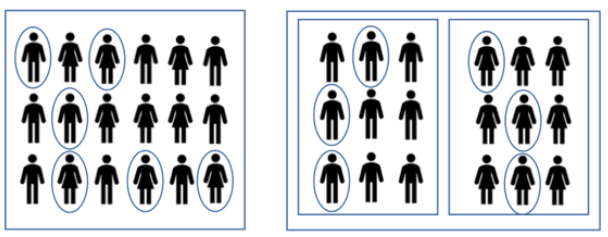

In [7]:
from sklearn.model_selection import train_test_split

Xtreino, Xteste, Ytreino, Yteste = train_test_split(df[['comp_sepala', 'comp_petala']], df['classe'], test_size=.3, stratify=df['classe'], random_state=0)

### Tratamento 2

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xtreino = ss.fit_transform(Xtreino)
Xteste = ss.transform(Xteste)

## Treinamento do modelo com Árvore de Decisão

Treinar e visualizar a árvore.


In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

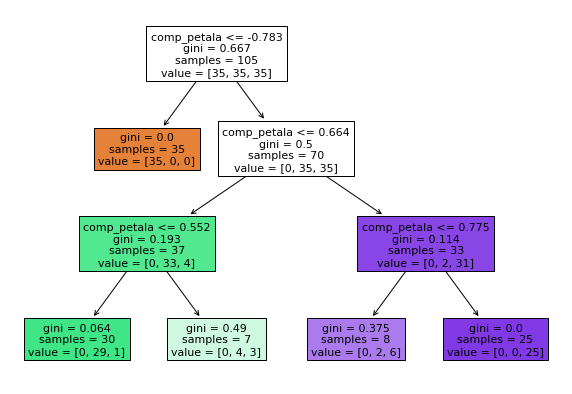

In [10]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

dtc = DecisionTreeClassifier(max_depth=3, random_state=0)
dtc.fit(Xtreino, Ytreino)

plt.rcParams['figure.figsize'] = (10, 7)
plot_tree(dtc, filled=True, feature_names=['comp_sepala', 'comp_petala']);

Verificar importância de cada coluna

In [11]:
fn = ['comp_sepala', 'comp_petala']
for nome, importancia in zip(fn, dtc.feature_importances_):
  print(f"Nome: {nome} - Importância: {importancia}")

Nome: comp_sepala - Importância: 0.0
Nome: comp_petala - Importância: 1.0


## Visualização da superfície de separação

In [12]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
import matplotlib.pyplot as plt

# utilizar apenas duas dimensoes
def plot_limites_decisao(X, y, modelo):
    
    min1, max1 = X[X.columns[0]].min()-.15, X[X.columns[0]].max()+.15
    min2, max2 = X[X.columns[1]].min()-.15, X[X.columns[1]].max()+.15

    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    xx, yy = meshgrid(x1grid, x2grid)

    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    grid = hstack((r1,r2))

    yhat = modelo.predict(grid)
    zz = yhat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='plasma')

    for class_value in range(3):
        row_ix = where(y == class_value)
        for p in row_ix:
            plt.scatter(X.iloc[p, 0], X.iloc[p, 1], cmap='plasma')

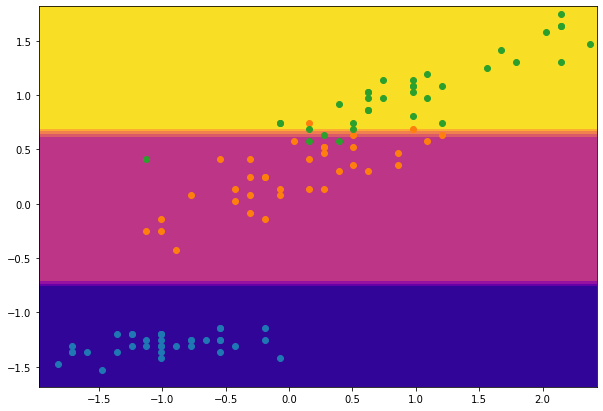

In [13]:
# Chamada para visualização
xt = pd.DataFrame(Xtreino)
yt = pd.Series(Ytreino)

plot_limites_decisao(xt, yt, dtc)

## Encontrando o melhor valor de ...

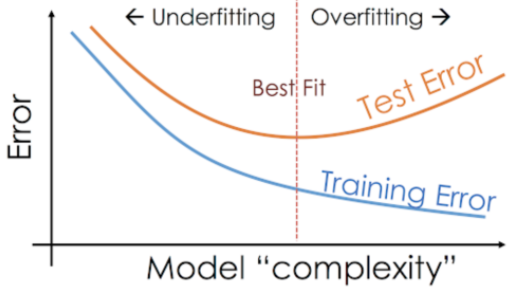

In [14]:
# Utilizaremos a métrica de acurácia para treino e teste.
# calcular 5 vezes para cada definição de profundidade máxima
from sklearn.metrics import accuracy_score

acc_treino = {}
acc_teste = {}

for profundidade in range(1, 31):
  acc_treino[profundidade] = []
  acc_teste[profundidade] = []

  for rs in range(0, 5):
    Xtreino, Xteste, Ytreino, Yteste = train_test_split(df[['comp_sepala', 'comp_petala']], 
                                                        df['classe'], 
                                                        test_size=.3, 
                                                        stratify=df['classe'], 
                                                        random_state=rs)
    
    ss = StandardScaler()
    Xtreino = ss.fit_transform(Xtreino)
    Xteste = ss.transform(Xteste)

    dtc = DecisionTreeClassifier(max_depth=profundidade, random_state=rs)
    dtc.fit(Xtreino, Ytreino)

    y_pred_treino = dtc.predict(Xtreino)
    acc_treino[profundidade].append(accuracy_score(Ytreino, y_pred_treino))
    

    y_pred_teste = dtc.predict(Xteste)
    acc_teste[profundidade].append(accuracy_score(Yteste, y_pred_teste))

In [15]:
df_tr = pd.DataFrame(acc_treino)
df_te = pd.DataFrame(acc_teste)

In [16]:
# Encontrar o melhor valor para teste

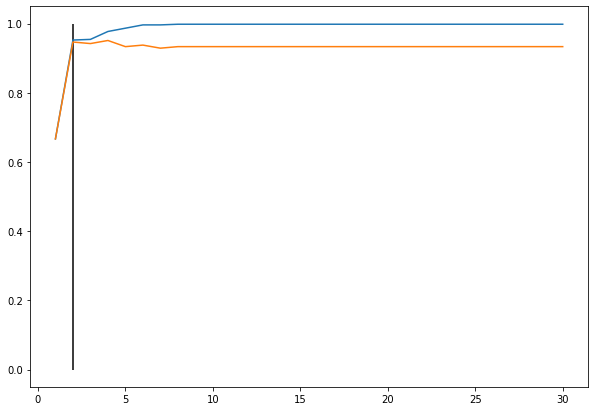

In [17]:
# Plotar os valores encontrados
import matplotlib.pyplot as plt

plt.plot(range(1, 31), df_tr.mean());
plt.plot(range(1, 31), df_te.mean());
plt.vlines(x=2, ymin=0, ymax=1);

## Treinamento com melhor ...

In [18]:
Xtreino, Xteste, Ytreino, Yteste = train_test_split(df[['comp_sepala', 'comp_petala']], 
                                                        df['classe'], 
                                                        test_size=.3, 
                                                        stratify=df['classe'], 
                                                        random_state=0)
    
ss = StandardScaler()
Xtreino = ss.fit_transform(Xtreino)
Xteste = ss.transform(Xteste)

dtc = DecisionTreeClassifier(max_depth=2, random_state=0)
dtc.fit(Xtreino, Ytreino)

DecisionTreeClassifier(max_depth=2, random_state=0)

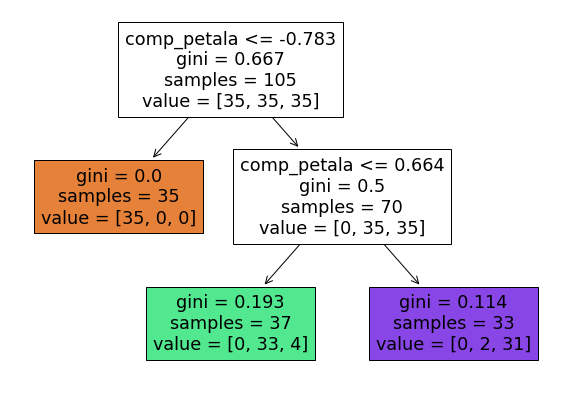

In [19]:
plot_tree(dtc, filled=True, 
          feature_names=['comp_sepala', 'comp_petala']);

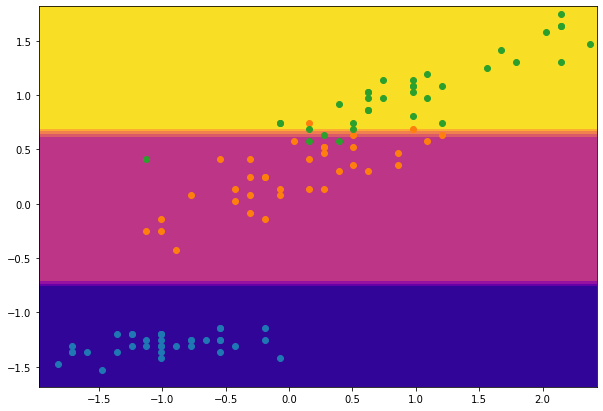

In [20]:
# Chamada para visualização
xt = pd.DataFrame(Xtreino)
yt = pd.Series(Ytreino)

plot_limites_decisao(xt, yt, dtc)

## Validação com as métricas Acurácia, Precisão e Revocação (*Recall*)

In [21]:
from sklearn.metrics import classification_report

print(classification_report(Ytreino, dtc.predict(Xtreino)))
print(classification_report(Yteste, dtc.predict(Xteste)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.89      0.94      0.92        35
           2       0.94      0.89      0.91        35

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Validação com Matriz de Confusão

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


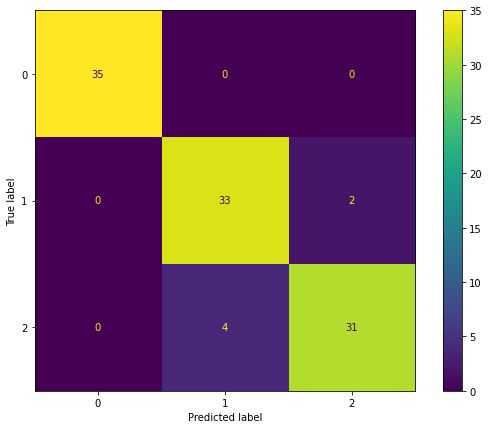

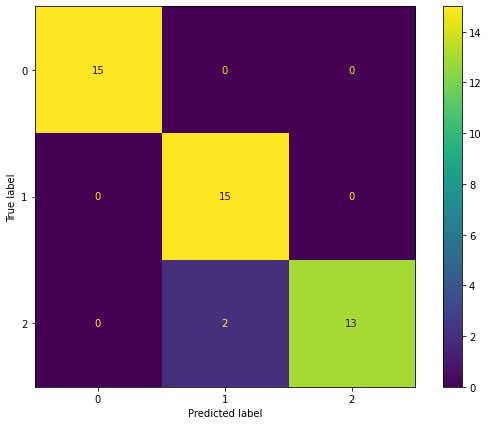

In [22]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(dtc, Xtreino, Ytreino)


plot_confusion_matrix(dtc, Xteste, Yteste)



---



In [32]:
## preparar o modelo para a produção

df = pd.read_csv("http://bit.ly/iris_ds", names=['comp_sepala', 'larg_sepala', 'comp_petala', 'larg_petala', 'classe'])

df = df[ ['comp_sepala', 'comp_petala', 'classe'] ]
df.head()

,comp_sepala,comp_petala,classe
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa


In [33]:
ss = StandardScaler()

df [ ['comp_sepala', 'comp_petala'] ] = ss.fit_transform( df [ ['comp_sepala', 'comp_petala'] ] )

df.head()

,comp_sepala,comp_petala,classe
0,-0.900681,-1.341272,Iris-setosa
1,-1.143017,-1.341272,Iris-setosa
2,-1.385353,-1.398138,Iris-setosa
3,-1.506521,-1.284407,Iris-setosa
4,-1.021849,-1.341272,Iris-setosa


In [34]:
df = df.sample(frac=1) #embaralhar os dados

In [35]:
dtc = DecisionTreeClassifier(max_depth=2, random_state=0)

dtc.fit(df [ ['comp_sepala', 'comp_petala'] ], df['classe'])

DecisionTreeClassifier(max_depth=2, random_state=0)

In [37]:
import pickle

with open('objetos.pkl', 'wb') as arquivo:
  pickle.dump([ss, dtc], arquivo)
